In [2]:
import cartopy.crs as ccrs #to produce maps and other geospatial data analyses
import cartopy.feature as cfeature  #Represents a collection of points, lines and polygons with convenience methods for common drawing and filtering operation
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cmocean  #colormap selection 
import pandas as pd

from eofs.xarray import Eof #Python package for EOF analysis of spatial-temporal data.
from eofs.examples import example_data_path




In [8]:
sst.min()

<xarray.DataArray 'SOSSTSST' ()>
array(9.4026375, dtype=float32)

Which year SST Temperature and anamoly would you like to see (starting from Jan88 as 1): 1
Enter the number of EOF Mode you want to generate: 4
Enter the number of EOF mode and its respective PC series would you like to see: 4
Enter The month number to see reconstructed image baseg on above EOF mode and PC series: 1


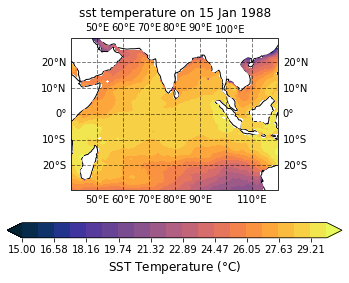

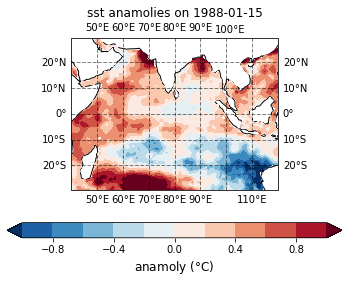

IndexError: index 4 is out of bounds for axis 0 with size 4

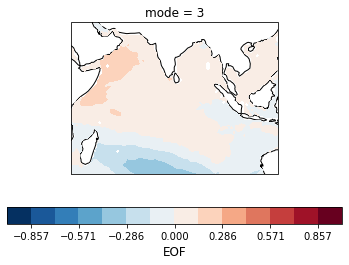

In [6]:
# Read SST anomalies using the xarray module. The file contains November-March
# averages of SST anomaly in the central and northern Pacific.
filename =('1988to2018_sstdata_lat30_30_lon40_120.nc')
sst = xr.open_dataset(filename)['SOSSTSST']   #Fetching the Data Array from SST
# sst

#############################
val=input("Which year SST Temperature and anamoly would you like to see (starting from Jan88 as 1):",)

#############################
# val = input("Enter EOF Number You want(1 or graeter than 1): ") #Taking input from user
val2=input("Enter the number of EOF Mode you want to generate:",)

#Taking input from user for EOF presentation
val3=input("Enter the number of EOF mode and its respective PC series would you like to see:",)

#######################
#input for reconstruction purpose
val4=input("Enter The month number to see reconstructed image baseg on above EOF mode and PC series:",)

##############################

clevs = np.linspace(15, 30, 20)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = sst[int(val)-1,:,:].plot.contourf(ax=ax, levels=clevs, cmap=cmocean.cm.thermal,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label(r'SST Temperature ($\degree$C)', fontsize=12)

from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,LatitudeLocator)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.5, linestyle='--')
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()

# g=sst.coords["TIME"][int(val)-1].values
# g1=str('sst temperature on ')+str(g)
# s = g1.split("T", 1)
ax.set_title('sst temperature on %s' %sst.TIME[0].dt.strftime('%d %b %Y').values, fontsize=12)

#plt.savefig('SST Temperature of Jan98.jpg',dpi=350)

plt.show()
#sst[int(val)-1,:,:]

###################################
anomalies = sst.groupby("TIME.month") - sst.groupby("TIME.month").mean("TIME")
anomalies


# Compute anomalies by removing the time-mean.
y = sst - sst.mean(dim='TIME')
y
y.values = anomalies.values

######################################
#Plotting anamolies
clevs = np.linspace(-1,1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = anomalies[int(val)-1,:,:].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label(r'anamoly ($\degree$C)', fontsize=12)

g=anomalies.coords["TIME"][int(val)-1].values
g1=str('sst anamolies on ')+str(g)
s = g1.split("T", 1)
ax.set_title(s[0],fontsize=12)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.5, linestyle='--')

#plt.savefig('SST anamolies of Jan98.jpg',dpi=350)

plt.show()

##############################################
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(anomalies.coords['LAT61_120'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(y, weights=wgts)

##############################################
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.

eof1 = solver.eofsAsCovariance(neofs=int(val2))
pc1 = solver.pcs(npcs=int(val2), pcscaling=1)

##############################################

# Plot the leading EOF expressed as correlation in the Pacific domain.
#take user input to show eof and PC's
# no=input("Enter the number of eof and PC's you want to see (1 or graeter than 1):")
clevs = np.linspace(-1, 1, 15)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[int(val3)-1].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('EOF', fontsize=12)

g=eof1.coords["mode"][int(val3)].values
g1=str('EOF Mode ')+str(g)
s = g1.split("T", 1)
ax.set_title(s[0],fontsize=12)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.5, linestyle='--')

# plt.savefig('EOF Mode 1.jpg',dpi=200)

########################################
# Plot the leading PC time series.
plt.figure()
pc1[:, int(val3)-1].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('PC Amplitude (Normalized Units)')

g=pc1.coords["mode"][int(val3)].values
g1=str('PC Series of mode ')+str(g)
s = g1.split("T", 1)
ax.set_title(s[0],fontsize=12)

# plt.savefig('PC Time Series(mode 1).jpg',dpi=300)
plt.show()


######################################
#Fractional EOF variances
variance_fractions = solver.varianceFraction()
plt.figure()
variance_fractions.plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
#ax.set_ylim(-3, 3)
ax.set_xlabel('EOF Mode Number')
ax.set_ylabel('Variance fractions')
ax.set_title('Fraction of the total variance explained by each EOF mode',fontsize=12)

#######################################
#calculation of reconstruction of image
s1=eof1[int(val3)-1]*pc1[:,int(val3)-1][int(val4)-1]
s1

#plotting of reconstruction of image
clevs = np.linspace(-1, 1, 21)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = s1.plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('EOF', fontsize=12)

g=s1.coords["TIME"].values
g1=str('Reconstructed image using the EOF mode and PC series ')+str(g)
s = g1.split("T", 1)
ax.set_title(s[0],fontsize=12)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.5, linestyle='--')

